In [1]:
import pandas as pd
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

from sec_2a import split_data
from sec_2d import CVgeneric
%matplotlib inline

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
train_X, _, test_X, train_y, _, test_y = split_data(val_ratio=0, split_method=1, random_state=0)

In [3]:
predict_y = (pd.Series(Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=35))])
             .fit(train_X[['NDAI', 'SD', 'CORR', 'angle_DF', 'angle_CF', 'angle_BF', 'angle_AF', 'angle_AN']], train_y)
             .predict_proba(test_X[['NDAI', 'SD', 'CORR', 'angle_DF', 'angle_CF', 'angle_BF', 'angle_AF', 'angle_AN']])[:, 1] >= 0.37142857142857144)
             .apply(lambda b: 1 if b else -1))

In [4]:
predict_y.index = test_y.index

df = test_X.loc[test_y != predict_y, :].copy()
df['label'] =  test_y.loc[test_y != predict_y]
df['predict'] =  predict_y.loc[test_y != predict_y]
df.head()

,x,y,NDAI,SD,CORR,angle_DF,angle_CF,angle_BF,angle_AF,angle_AN,source,label,predict
326985,11.0,321.0,1.930085,7.492878,0.095533,155.38269,162.01741,172.11279,167.85260,165.36488,3,-1.0,1
126730,297.0,97.0,1.721645,8.089520,0.319936,308.66537,230.78499,211.28539,165.52382,148.33133,2,-1.0,1
125578,291.0,94.0,2.562278,4.349196,0.297186,322.92703,266.62936,222.61139,187.90128,173.23505,2,-1.0,1
221562,11.0,346.0,1.692463,43.484760,0.361825,338.58066,275.80963,168.60638,138.27448,122.31741,2,-1.0,1
46677,49.0,190.0,1.836148,8.936451,0.353193,253.02757,212.48470,166.15237,138.69351,123.82016,1,-1.0,1


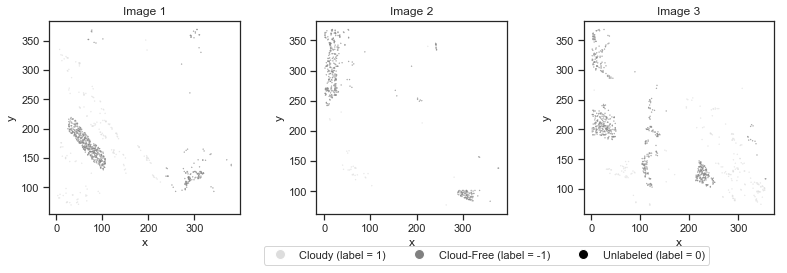

In [5]:
from sec_1b import label_plot

label_plot(df)

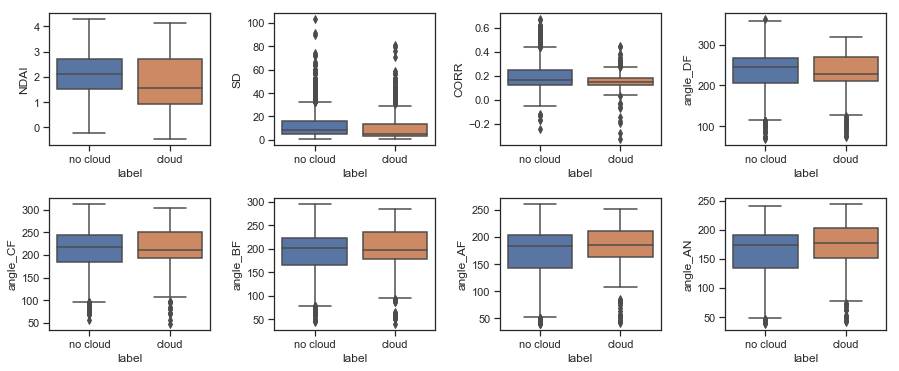

In [6]:
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(hspace=0.4, wspace=0.4, bottom=0.25)

for i, col in enumerate(df.columns[2:-3], 1):    
    ax = fig.add_subplot(2, 4, i)
    sns.boxplot(x="label", y=col, data=df, ax=ax)
    ax.set_xticklabels(["no cloud", "cloud"])

In [7]:
import time

times = []
for count in range(35, len(train_X), 5000):
    start = time.time()
    sample_index = train_X.index.to_series().sample(count)
    features = ['NDAI', 'SD', 'CORR', 'angle_DF', 'angle_CF', 'angle_BF', 'angle_AF', 'angle_AN']
    predict_y = (pd.Series(Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=35))])
                 .fit(train_X.loc[sample_index][features], train_y.loc[sample_index])
                 .predict_proba(test_X[features])[:, 1] >= 0.37142857142857144)
                 .apply(lambda b: 1 if b else -1))
    end = time.time()
    times += [end - start]  

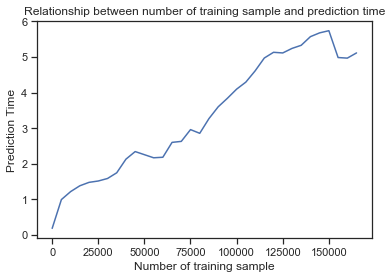

In [8]:
plt.plot(range(35, len(train_X), 5000), times)
plt.xlabel('Number of training sample')
plt.ylabel('Prediction Time') 
plt.title('Relationship between number of training sample and prediction time');

In [9]:
accuracy_scores = []
for count in range(35*5, len(train_X), 5000):
    sample_index = train_X.index.to_series().sample(count)
    features = ['NDAI', 'SD', 'CORR', 'angle_DF', 'angle_CF', 'angle_BF', 'angle_AF', 'angle_AN']
    predict_y = (pd.Series(Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=35))])
                 .fit(train_X.loc[sample_index][features], train_y.loc[sample_index])
                 .predict_proba(test_X[features])[:, 1] >= 0.37142857142857144)
                 .apply(lambda b: 1 if b else -1))
    accuracy_scores += [accuracy_score(test_y, predict_y)]


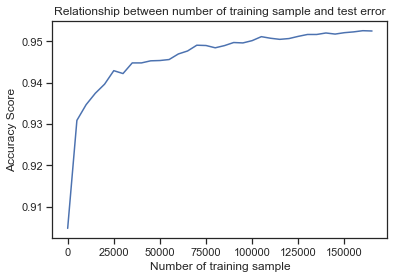

In [10]:
plt.plot(range(35, len(train_X), 5000), accuracy_scores)
plt.xlabel('Number of training sample')
plt.ylabel('Accuracy Score') 
plt.title('Relationship between number of training sample and test error');

In [11]:
sum([1 if a <0.95 else 0 for a in accuracy_scores])

20